# 📊 ElasticNet Regression no Dataset Diabetes

## 📌 Sobre o Dataset
O **Diabetes Dataset** contém medidas clínicas e laboratoriais de pacientes para prever a progressão da doença ao longo do tempo. Ele inclui variáveis como:

- 🩸 **Nível de glicose no sangue**
- 🏋️ **Índice de massa corporal (IMC)**
- 👴 **Idade do paciente**
- 🩺 **Pressão arterial**
- 🧬 **Medições enzimáticas e genéticas**

Este conjunto de dados é amplamente utilizado para modelagem preditiva em regressão.

---

## 📂 Estrutura do Dataset
O dataset contém 10 features de entrada e 1 variável alvo (**progressão da doença**). Abaixo está a tabela com as descrições das variáveis:

| **Feature**   | **Descrição** |
|--------------|-------------|
| `age`        | Idade do paciente em anos (normalizada). |
| `sex`        | Sexo do paciente (codificado numericamente). |
| `bmi`        | Índice de massa corporal (peso ajustado pela altura). |
| `bp`         | Pressão arterial média. |
| `s1`         | Nível de colesterol total no sangue. |
| `s2`         | Nível de lipoproteína de baixa densidade (LDL). |
| `s3`         | Nível de lipoproteína de alta densidade (HDL). |
| `s4`         | Razão entre colesterol total e HDL. |
| `s5`         | Nível de glicose no sangue. |
| `s6`         | Nível de insulina no sangue. |
| **`target`** | Progressão da diabetes após um ano. (Variável alvo) |

---

## 🚀 O que este código faz?
✔ **Carrega e analisa o dataset Diabetes**  
✔ **Visualiza a distribuição das variáveis**  
✔ **Normaliza os dados para melhor desempenho do modelo**  
✔ **Treina um modelo ElasticNet Regression (L1 + L2 Regularization)**  
✔ **Ajusta os hiperparâmetros usando GridSearchCV**  
✔ **Avalia o modelo com MAE, MSE, RMSE e R²**  
✔ **Gera gráficos para análise de erros e previsões**  
✔ **Exibe a importância das features no modelo**  

---

## 🛠️ Como rodar o código?
### 1️⃣ Instale as dependências:
```bash
pip install numpy pandas scikit-learn seaborn matplotlib


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

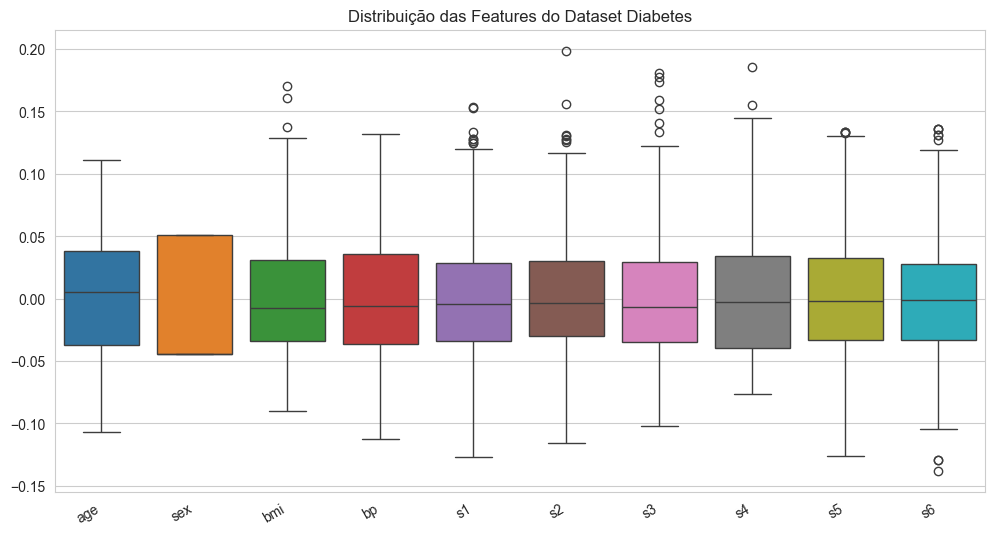

Melhores hiperparâmetros: {'alpha': 0.1, 'l1_ratio': 0.2}
MAE: 42.9305
MSE: 2862.0714
RMSE: 53.4983
R² Score: 0.4598


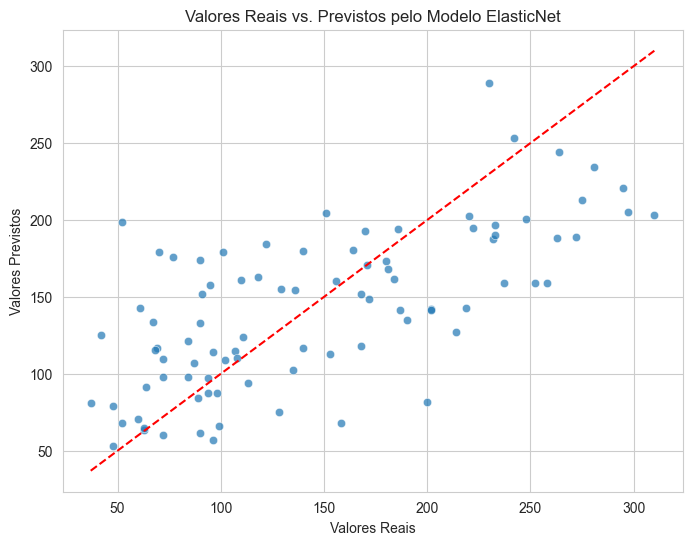

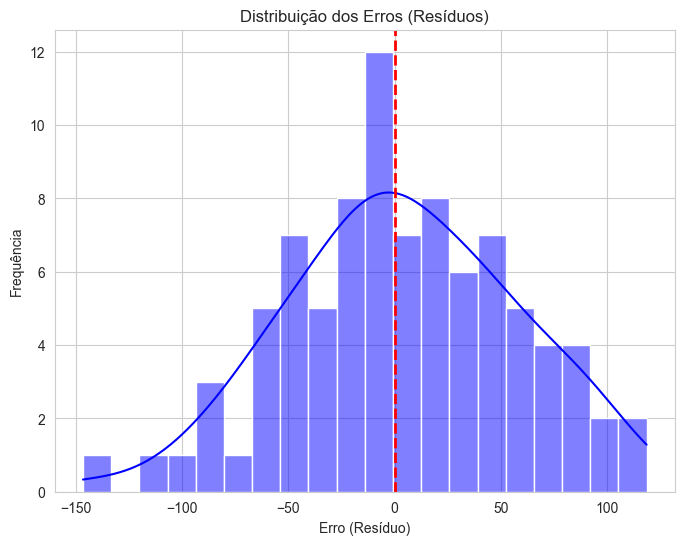

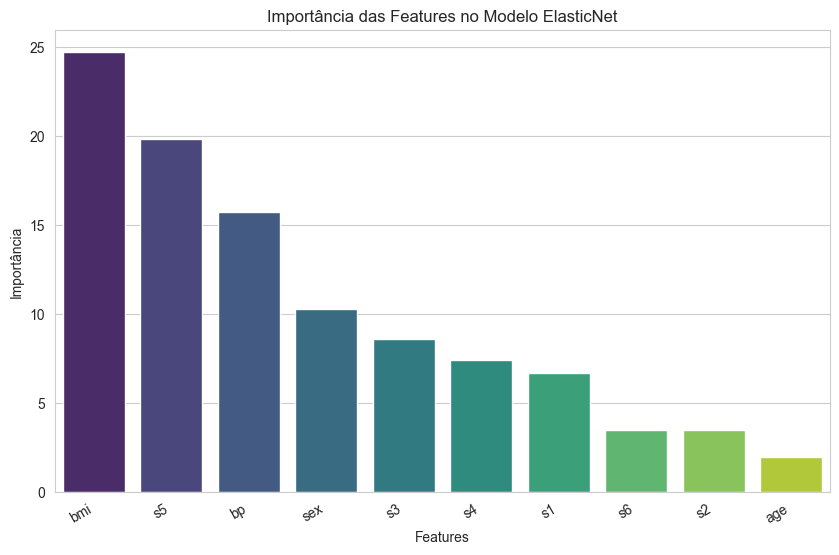

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregar o dataset Diabetes
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Exibir estatísticas básicas
print(X.describe())

# Gráfico de distribuição das features
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=X, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_title("Distribuição das Features do Dataset Diabetes")
plt.show()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir o modelo ElasticNet com ajuste de hiperparâmetros
elastic_net = ElasticNet()
param_grid = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Fazer previsões
y_pred = best_model.predict(X_test_scaled)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Exibir métricas
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Gráfico de dispersão - valores reais vs previstos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Previstos pelo Modelo ElasticNet")
plt.show()

# Gráfico de resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=20, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Erro (Resíduo)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Erros (Resíduos)")
plt.show()

# Importância das Features
importances = np.abs(best_model.coef_)
features = data.feature_names
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(features)[sorted_indices], y=importances[sorted_indices], palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features no Modelo ElasticNet")
plt.show()